# Introduction

This notebook introduces the OpenKMI package. OpenKMI serves as a wrapper around the WFS service that KMI offers to download both synoptic measurements and data from the automatic weather stations.

This notebook focuses on the data from the automatic weather stations.

* https://opendata.meteo.be/geonetwork/srv/eng/catalog.search;jsessionid=041EE12A028F9B77DC961A99CDE0DAA4#/metadata/RMI_AWS_WFS
* https://opendata.meteo.be/geonetwork/srv/eng/catalog.search;jsessionid=041EE12A028F9B77DC961A99CDE0DAA4#/metadata/RMI_DATASET_AWS_1HOUR


# Initialize the package

First load the modules we will use

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd   
from openkmi.point_obs import AWS

Then initialize the package. AWS data can be donwloaded on 3 different frequencies:
* 10 min data
* hourly data (default)
* daily data

In [2]:
# the default value is hourly
kmi_hour = AWS()
# add the freq parameter to change the frequency to e.g. 10 min
kmi_10min = AWS(freq='10T')
# or 1 day
kmi_day = AWS(freq='D')

# Inspect the available stations

You can use OpenKMI to get an overview of all stations where you can collect the data for.
At present only the data for station 'Zeebrugge' and 'Humain' from 2017-11-18 onwards are publicly available.

In [3]:
df_stations = kmi_hour.get_stations()
print(f'There are {df_stations.shape[0]} stations available')

There are 2 stations available


In [4]:
df_stations

,code,the_geom,altitude,name,date_begin,date_end
5,6472,POINT (50.193663 5.255236),295.3,HUMAIN,2017-11-18T00:00:00,NaN
11,6418,POINT (51.347375 3.201846),12.1,ZEEBRUGGE,2017-11-18T00:00:00,NaN


# Inspect the available parameters

Let's see what data is in the wfs and what data we can use to filter upon.

In [5]:
kmi_hour.get_parameters()

{'code': 'int',
 'timestamp': 'dateTime',
 'air_pressure': 'decimal',
 'air_temperature': 'decimal',
 'relative_humidity': 'decimal',
 'precipitation': 'decimal',
 'wind_speed': 'decimal',
 'qc_flags': 'string'}

# Download data

For downloading the data you need to provide at least the station code. Optional parameters are:
* **start_date and end_date**: These are used to limit the requested data
* **parameter_list**: List of parameters to download

## Example: Simple request to fetch wind speed

To get the wind speed for the station at ZEEBRUGGE for februari 2020 you can use the following command:

In [6]:
df_hour = kmi_hour.get_data('6418', start_date='2022-02-01T00:00:00', end_date='2022-03-01T00:00:00', parameter_list=['wind_speed'])
df_10min = kmi_10min.get_data('6418', start_date='2022-02-01T00:00:00', end_date='2022-03-01T00:00:00', parameter_list=['wind_speed'])
df_day = kmi_day.get_data('6418', start_date='2022-02-01T00:00:00', end_date='2022-03-01T00:00:00', parameter_list=['wind_speed'])

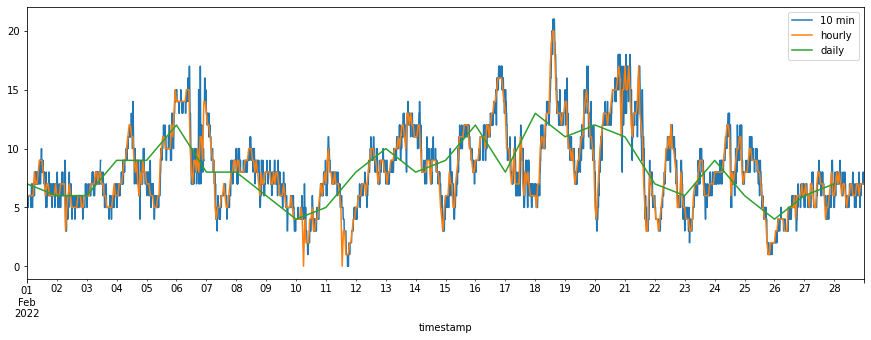

In [7]:
fix, ax = plt.subplots(figsize=(15,5))
df_10min.plot(ax=ax)
df_hour.plot(ax=ax)
df_day.plot(ax=ax)
ax.legend(['10 min', 'hourly', 'daily'])